# PDIE8 - Processamento Digital de Imagem

![Capa](https://m.media-amazon.com/images/I/71wa841+qgL._AC_UF1000,1000_QL80_.jpg)

##### Repositorio dos Códigos feitos em aula da Disciplina

#### Feito por: Vinicius de Souza Santos
#### Lecionado por: Murilo Varges

# Aula 11 - 16/10 - Segmentação - Parte 1

- Segmentação de imagens
- Introdução
- Detecção de pontos
- Detecção de bordas
- Detecção de retas

# Atividades - Segmentação Parte 1

1. Implementar detector de ponto conforme slide 17.

    1.1. Tirar uma foto de uma imagem com um fundo branco e fazer alguns pontos com caneta preta

2. Implementar limiarização, definir 

3. Implementar detector de bordas Canny.

    3.1. Aplicar o filtro de borramento (gaussiano) e verificar se o borramento melhora a detecção de bordas.

    3.2. Mudar os parametros T1 e T2 e avaliar a qualidade das bordas detectadas.



1. Implementar detector de ponto conforme slide 17.

    1.1. Tirar uma foto de uma imagem com um fundo branco e fazer alguns pontos com caneta preta

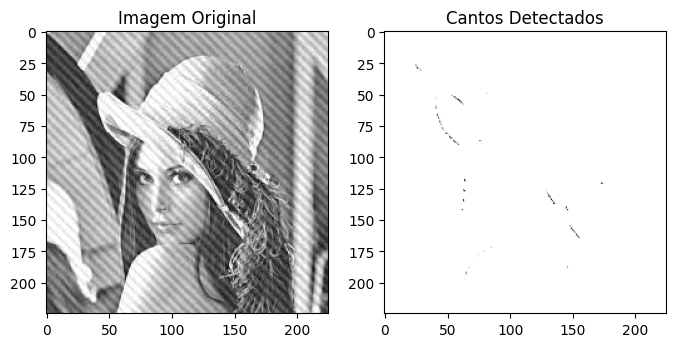

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
image = cv2.imread('/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 11/img/lena.png', 0)  # Substitua 'sua_imagem.jpg' pelo caminho da sua imagem

# Parâmetros do detector de pontos Harris
block_size = 2  # Tamanho da vizinhança considerada para cada ponto
ksize = 3  # Tamanho do kernel Sobel usado para calcular gradientes
k = 0.04  # Parâmetro de sensibilidade

# Aplicar o detector de pontos Harris
harris_corners = cv2.cornerHarris(image, block_size, ksize, k)

# Normalizar os resultados para visualização
harris_corners = cv2.normalize(harris_corners, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Definir um limite para destacar os cantos
threshold = 100

# Desenhar círculos nos cantos detectados
image_with_corners = image.copy()
image_with_corners[harris_corners > threshold] = 255

# Exibir a imagem original com os cantos destacados
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(image_with_corners, cmap='gray')
plt.title('Cantos Detectados')

plt.show()


2. Implementar limiarização, definir 

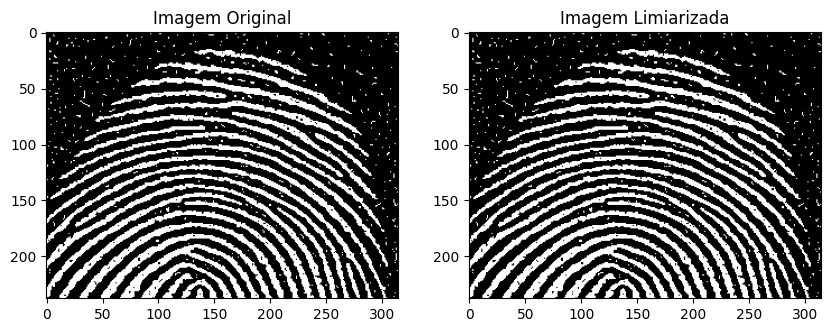

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Carregar a imagem
image = cv2.imread('/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 11/img/fingerprint.png', 0)  # Certifique-se de substituir 'sua_imagem.jpg' pelo caminho da sua imagem

# Aplicar a limiarização
threshold_value = 128  # Você pode ajustar esse valor de acordo com suas necessidades
_, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Exibir a imagem original e a imagem limiarizada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Imagem Limiarizada')

plt.show()


3. Implementar detector de bordas Canny.

    3.1. Aplicar o filtro de borramento (gaussiano) e verificar se o borramento melhora a detecção de bordas.

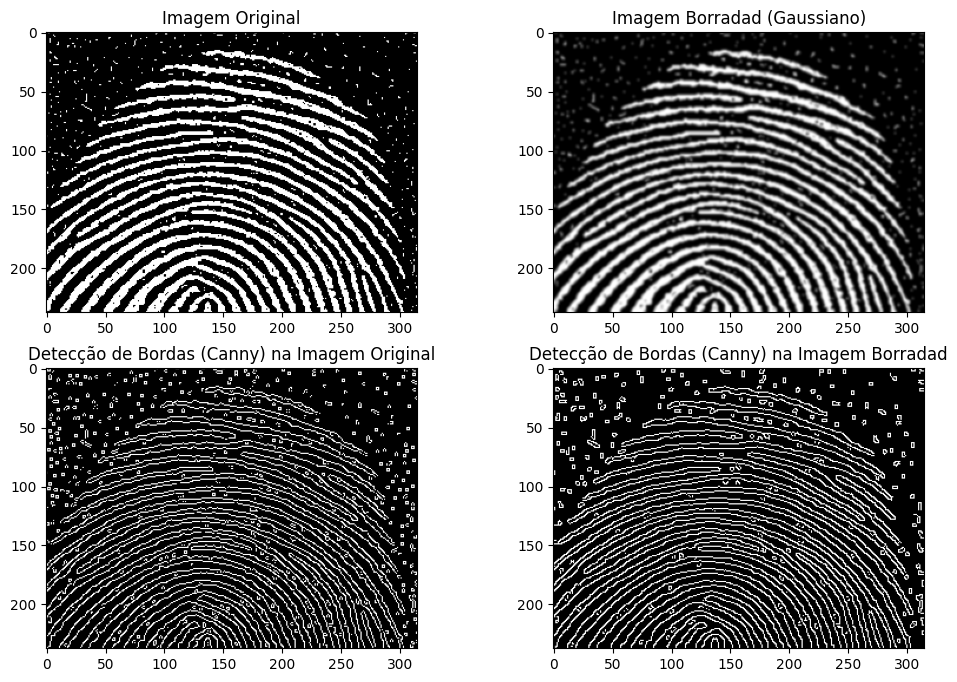

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
image = cv2.imread('/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 11/img/fingerprint.png', 0)  # Substitua 'sua_imagem.jpg' pelo caminho da sua imagem

# 2.1. Aplicar filtro de borramento gaussiano
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # O segundo argumento é o tamanho do kernel gaussiano

# Aplicar o detector de bordas Canny na imagem original
canny_edges = cv2.Canny(image, 100, 200)  # Você pode ajustar os limiares conforme necessário

# Aplicar o detector de bordas Canny na imagem borradad
canny_edges_blurred = cv2.Canny(blurred_image, 100, 200)  # Novamente, ajuste os limiares conforme necessário

# Exibir as imagens
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')

plt.subplot(2, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Imagem Borradad (Gaussiano)')

plt.subplot(2, 2, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('Detecção de Bordas (Canny) na Imagem Original')

plt.subplot(2, 2, 4)
plt.imshow(canny_edges_blurred, cmap='gray')
plt.title('Detecção de Bordas (Canny) na Imagem Borradad')

plt.show()


3.2. Mudar os parametros T1 e T2 e avaliar a qualidade das bordas detectadas.

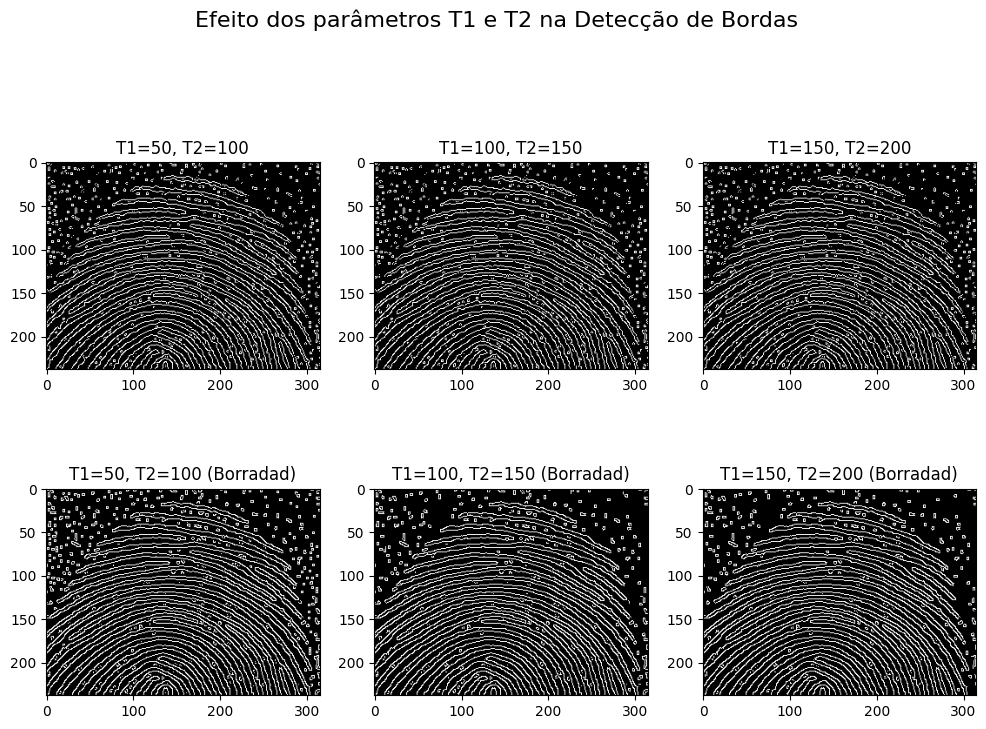

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
image = cv2.imread('/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 11/img/fingerprint.png', 0)  # Substitua 'sua_imagem.jpg' pelo caminho da sua imagem

# 2.1. Aplicar filtro de borramento gaussiano
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # O segundo argumento é o tamanho do kernel gaussiano

# Definir diferentes valores de T1 e T2
T1_values = [50, 100, 150]
T2_values = [100, 150, 200]

plt.figure(figsize=(12, 12))
plt.suptitle('Efeito dos parâmetros T1 e T2 na Detecção de Bordas', fontsize=16)

for i, (T1, T2) in enumerate(zip(T1_values, T2_values)):
    # Aplicar o detector de bordas Canny com os valores de T1 e T2
    canny_edges = cv2.Canny(image, T1, T2)

    plt.subplot(3, 3, i + 1)
    plt.imshow(canny_edges, cmap='gray')
    plt.title(f'T1={T1}, T2={T2}')

    plt.subplot(3, 3, i + 4)
    canny_edges_blurred = cv2.Canny(blurred_image, T1, T2)
    plt.imshow(canny_edges_blurred, cmap='gray')
    plt.title(f'T1={T1}, T2={T2} (Borradad)')

plt.show()
